In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/precious/Desktop/insurance-claim-prediction/data/cleaned_train_data.csv")

In [2]:
print(df.shape)
print(df.columns)
df.head()

(7160, 8486)
Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Claim',
       'Customer Id_H12616', 'Customer Id_H12617', 'Customer Id_H12619',
       ...
       'Geo_Code_95428', 'Geo_Code_95488', 'Geo_Code_95500', 'Geo_Code_95539',
       'Geo_Code_95555', 'Geo_Code_95563', 'Geo_Code_95582', 'Geo_Code_95585',
       'Geo_Code_95598', 'Geo_Code_95607'],
      dtype='object', length=8486)


,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim,Customer Id_H12616,Customer Id_H12617,Customer Id_H12619,...,Geo_Code_95428,Geo_Code_95488,Geo_Code_95500,Geo_Code_95539,Geo_Code_95555,Geo_Code_95563,Geo_Code_95582,Geo_Code_95585,Geo_Code_95598,Geo_Code_95607
0,2013,1.0,0,290.0,1,1960.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2015,1.0,0,490.0,1,1850.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2014,1.0,0,595.0,1,1960.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2013,1.0,0,2840.0,1,1960.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2014,1.0,0,680.0,1,1800.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
y = df["Claim"]

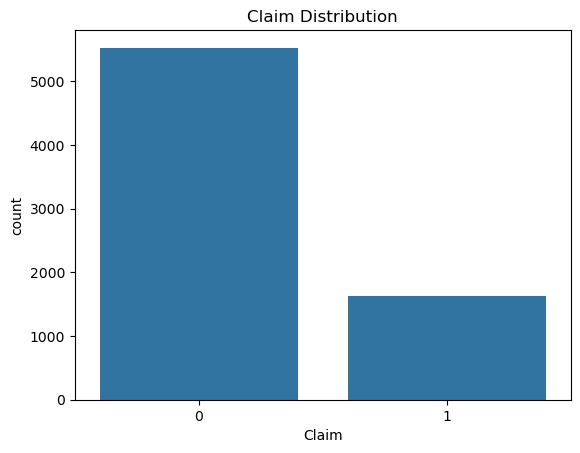

In [4]:
sns.countplot(x=y)
plt.title("Claim Distribution")
plt.show()

# **insight:**
The target variable 'Claim' is imbalanced, more buildings have no claims than those with claims. This affects model choice; accuracy alone may not be sufficient. Consider metrics like AUC, F1-score.

In [7]:
numeric_cols = df.select_dtypes(include=['number', 'bool']). columns
print("Numeric columns:", numeric_cols[:20])

Numeric columns: Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Claim',
       'Customer Id_H12616', 'Customer Id_H12617', 'Customer Id_H12619',
       'Customer Id_H12621', 'Customer Id_H12622', 'Customer Id_H12623',
       'Customer Id_H12625', 'Customer Id_H12626', 'Customer Id_H12628',
       'Customer Id_H12631', 'Customer Id_H12633', 'Customer Id_H12635',
       'Customer Id_H12638'],
      dtype='object')


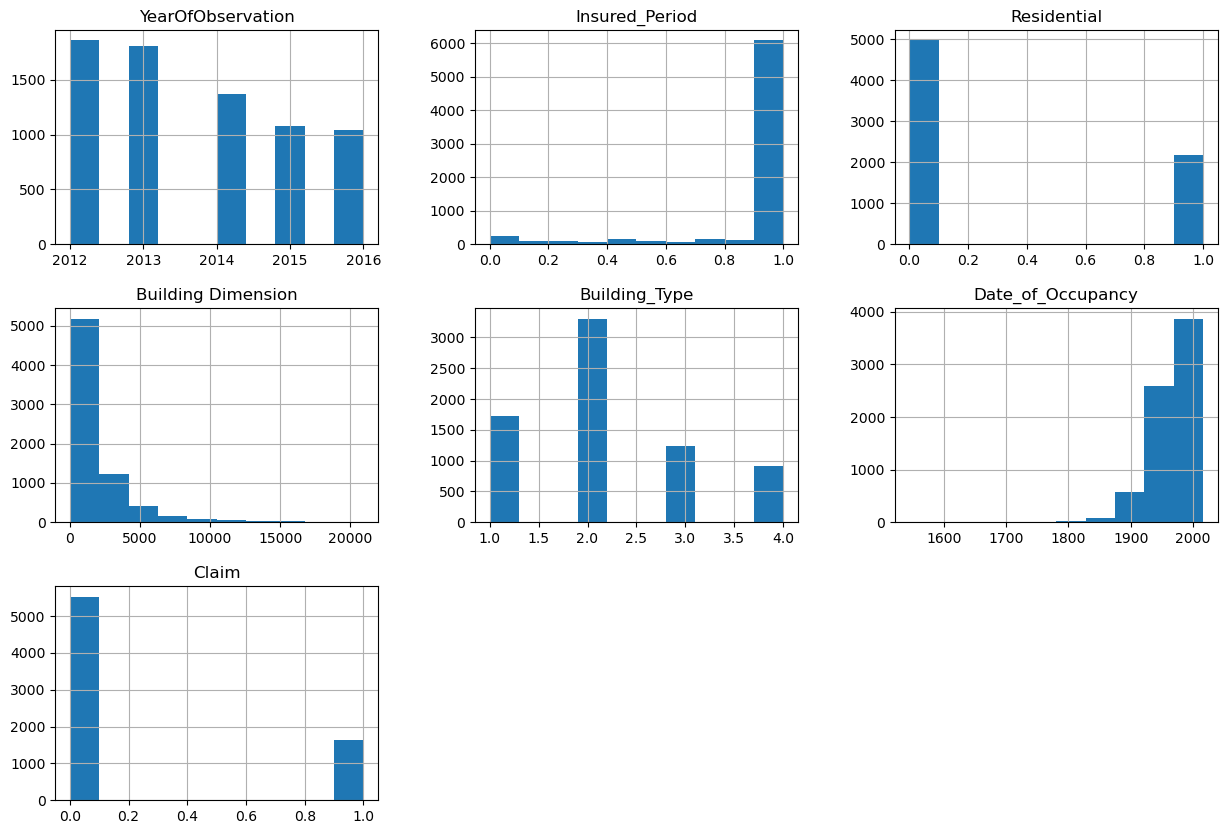

In [8]:
df[numeric_cols[:10]].hist(figsize=(15,10))
plt.show()

# **insight:**
Most numeric features are boolean (0/1), with few continous variables. Some features are skewed; scaling may be required for certain models.

In [9]:
corr_with_target = {col:
                    df[col].corr(df["Claim"]) for col in numeric_cols if col != "Claim"}

corr_target = pd.Series(corr_with_target).sort_values(ascending=False)

top_features = corr_target.index[:10]

print("Top 10 features most correlated with Claim:")
print(top_features)

print("\nCorrelation values:")
print(corr_target[top_features])

Top 10 features most correlated with Claim:
Index(['Building Dimension', 'Building_Type', 'Insured_Period',
       'NumberOfWindows_7', 'NumberOfWindows_8', 'NumberOfWindows_>=10',
       'Residential', 'NumberOfWindows_6', 'NumberOfWindows_9',
       'Geo_Code_75114'],
      dtype='object')

Correlation values:
Building Dimension      0.295558
Building_Type           0.112168
Insured_Period          0.088715
NumberOfWindows_7       0.082347
NumberOfWindows_8       0.075198
NumberOfWindows_>=10    0.068126
Residential             0.063509
NumberOfWindows_6       0.057861
NumberOfWindows_9       0.055776
Geo_Code_75114          0.054703
dtype: float64


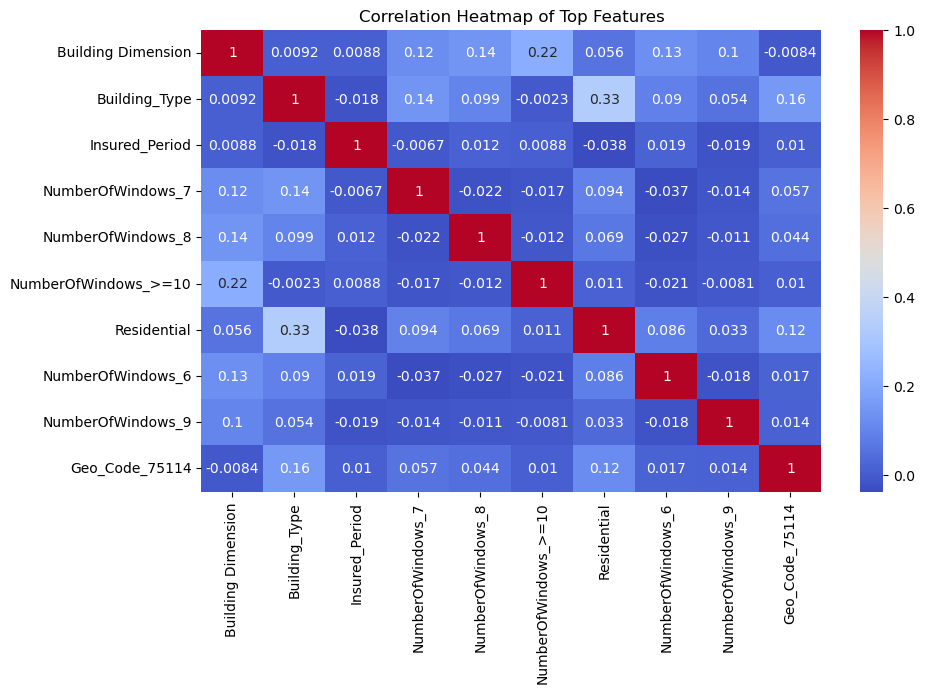

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df[top_features].corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap of Top Features")
plt.show()

# **Insight:**
- Building Dimension has the highest correlation with Claim (0.296), making it the strongest predictor.
- Other features like Building_Type and Insured_Period has moderate correlation (0.11 and 0.089).
- One-hot encoded window columns (NumberOfWindows_6, NumberOfWindow7, etc.) show weak correlation (~0.05-0.08) but are still useful as categorical predictors.
- Heatmap helps identify the most important features and potential multicollinearity.